# Analysis of Yelp Business Intelligence Data
To analyze a subset of Yelp's business, reviews and user data. 
### Hojin Lee

# Installation and Initial Setup

In [1]:
%%info

In [2]:
sc.install_pypi_package("matplotlib==3.2.1")
sc.install_pypi_package("pandas==1.0.3")
sc.install_pypi_package("scipy==1.7.1")
sc.install_pypi_package("seaborn==0.11.2")

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
0,application_1651360500865_0001,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Importing

In [3]:
from pyspark import SparkContext, SparkConf
from pyspark.sql.functions import split, col, explode
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Loading data

In [4]:
business = spark.read.json('s3://cis9760-yelpbucket/yelp_academic_dataset_business.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [5]:
business.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+--------------------+--------------------+-------------+--------------------+-------+----------+------------+--------------------+-----------+------------+-----+-----+
|             address|          attributes|         business_id|          categories|         city|               hours|is_open|  latitude|   longitude|                name|postal_code|review_count|stars|state|
+--------------------+--------------------+--------------------+--------------------+-------------+--------------------+-------+----------+------------+--------------------+-----------+------------+-----+-----+
|1616 Chapala St, ...|[,,,,,,,,,,, True...|Pns2l4eNsfO8kk83d...|Doctors, Traditio...|Santa Barbara|                null|      0|34.4266787|-119.7111968|Abby Rappoport, L...|      93101|           7|  5.0|   CA|
|87 Grasso Plaza S...|[,,,,,,,,, True,,...|mpf3x-BjTdTEA3yCZ...|Shipping Centers,...|       Affton|[8:0-18:30, 0:0-0...|      1| 38.551126|  -90.335695|    

# Overview of Data

In [6]:
row = business.count()
col = len(business.columns)
print(f'Number of columns in Business table: {col}')
print(f'Number of rows in Business table: {row}')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Number of columns in Business table: 14
Number of rows in Business table: 150346

In [7]:
busi_selected = business.select("business_id",
"name",
"city",
"state",
"categories")
busi_selected.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+-------------+-----+--------------------+
|         business_id|                name|         city|state|          categories|
+--------------------+--------------------+-------------+-----+--------------------+
|Pns2l4eNsfO8kk83d...|Abby Rappoport, L...|Santa Barbara|   CA|Doctors, Traditio...|
|mpf3x-BjTdTEA3yCZ...|       The UPS Store|       Affton|   MO|Shipping Centers,...|
|tUFrWirKiKi_TAnsV...|              Target|       Tucson|   AZ|Department Stores...|
|MTSW4McQd7CbVtyjq...|  St Honore Pastries| Philadelphia|   PA|Restaurants, Food...|
|mWMc6_wTdE0EUBKIG...|Perkiomen Valley ...|   Green Lane|   PA|Brewpubs, Breweri...|
+--------------------+--------------------+-------------+-----+--------------------+
only showing top 5 rows

# Analyzing Categories

In [8]:
business.select("business_id", "categories").show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+
|         business_id|          categories|
+--------------------+--------------------+
|Pns2l4eNsfO8kk83d...|Doctors, Traditio...|
|mpf3x-BjTdTEA3yCZ...|Shipping Centers,...|
|tUFrWirKiKi_TAnsV...|Department Stores...|
|MTSW4McQd7CbVtyjq...|Restaurants, Food...|
|mWMc6_wTdE0EUBKIG...|Brewpubs, Breweri...|
+--------------------+--------------------+
only showing top 5 rows

In [9]:
busi_exploded = business.withColumn('categories', explode(split("categories", ", ")))
busi_exploded.select("business_id", "categories").show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+
|         business_id|          categories|
+--------------------+--------------------+
|Pns2l4eNsfO8kk83d...|             Doctors|
|Pns2l4eNsfO8kk83d...|Traditional Chine...|
|Pns2l4eNsfO8kk83d...|Naturopathic/Holi...|
|Pns2l4eNsfO8kk83d...|         Acupuncture|
|Pns2l4eNsfO8kk83d...|    Health & Medical|
+--------------------+--------------------+
only showing top 5 rows

# Total Unique Categories

In [10]:
busi_exploded.select("categories").distinct().count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

1311

## Top Categories By Business


In [11]:
busi_exploded.createOrReplaceTempView('busi_exploded')
spark.sql("""
SELECT categories, COUNT(categories) as count
FROM busi_exploded
GROUP BY 1
""").show(20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|          categories|count|
+--------------------+-----+
|      Dermatologists|  336|
|      Paddleboarding|   98|
|        Aerial Tours|   12|
|Faith-based Crisi...|    1|
|         Hobby Shops|  552|
|          Bubble Tea|  477|
|             Embassy|    3|
|            Handyman|  356|
|             Tanning|  667|
|      Aerial Fitness|   19|
|             Falafel|  103|
|        Summer Camps|  232|
|       Outlet Stores|  182|
|     Clothing Rental|   37|
|      Sporting Goods| 1662|
|     Cooking Schools|   76|
|  Lactation Services|   27|
|Ski & Snowboard S...|   40|
|             Museums|  413|
|              Doulas|   31|
+--------------------+-----+
only showing top 20 rows

## Bar Chart of Top Categories


In [12]:
category_count = spark.sql("""
SELECT categories, COUNT(categories) as count
FROM busi_exploded
GROUP BY 1
ORDER BY 2 DESC
LIMIT 20
""")
category_count.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|          categories|count|
+--------------------+-----+
|         Restaurants|52268|
|                Food|27781|
|            Shopping|24395|
|       Home Services|14356|
|       Beauty & Spas|14292|
|           Nightlife|12281|
|    Health & Medical|11890|
|      Local Services|11198|
|                Bars|11065|
|          Automotive|10773|
|Event Planning & ...| 9895|
|          Sandwiches| 8366|
|American (Traditi...| 8139|
|         Active Life| 7687|
|               Pizza| 7093|
|        Coffee & Tea| 6703|
|           Fast Food| 6472|
|  Breakfast & Brunch| 6239|
|      American (New)| 6097|
|     Hotels & Travel| 5857|
+--------------------+-----+

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

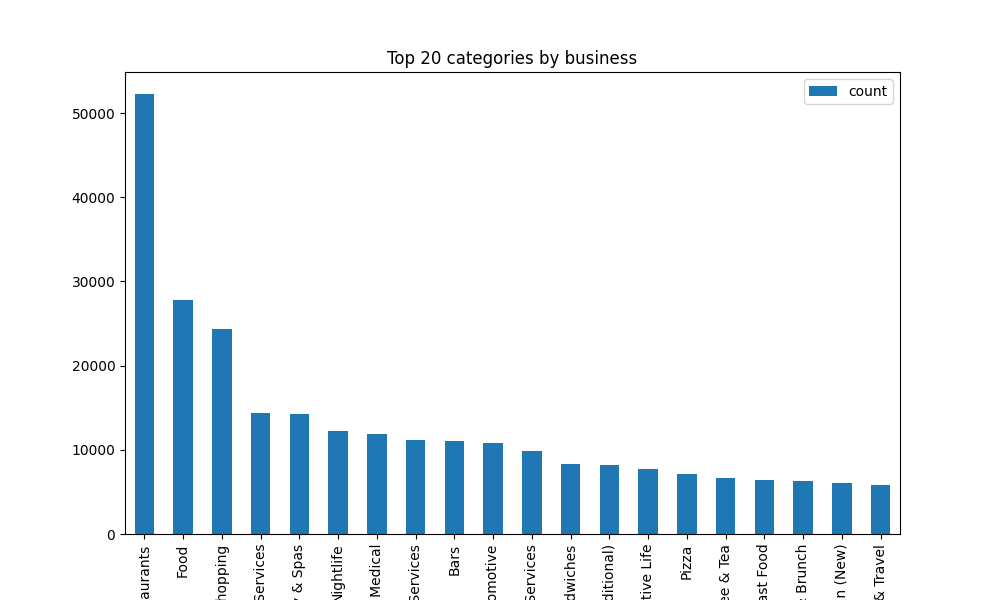

In [21]:
pdf = category_count.toPandas()
plt.figure(figsize=(10,6))
pdf.plot(kind='bar', x='categories', figsize=(10,6))
plt.title("Top 20 categories by business")
%matplot plt

## Loading User Data

In [13]:
review = spark.read.json('s3://cis9760-yelpbucket/yelp_academic_dataset_review.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [14]:
review.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)

In [15]:
review.select("business_id", "stars").show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|         business_id|stars|
+--------------------+-----+
|XQfwVwDr-v0ZS3_Cb...|  3.0|
|7ATYjTIgM3jUlt4UM...|  5.0|
|YjUWPpI6HXG530lwP...|  3.0|
|kxX2SOes4o-D3ZQBk...|  5.0|
|e4Vwtrqf-wpJfwesg...|  4.0|
+--------------------+-----+
only showing top 5 rows

In [16]:
review.createOrReplaceTempView('review')
review_only = spark.sql("""
SELECT DISTINCT business_id, avg(stars) as avg_stars
FROM review
WHERE text IS NOT NULL
GROUP BY business_id
""")
review_only.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------------+
|         business_id|         avg_stars|
+--------------------+------------------+
|zJErbOQMKX-MwHs_u...|2.9279279279279278|
|RZ-FNTXvqHKngyLGD...|2.8823529411764706|
|HSzSGdcNaU7heQe0N...|3.3333333333333335|
|skW4boArIApRw9DXK...|2.3947368421052633|
|I0053JmJ5DEFUWSJ8...|2.3956043956043955|
+--------------------+------------------+
only showing top 5 rows

In [17]:
busi_only = business.select("business_id", "name", "city", "state", "stars")
joined = busi_only.join(review_only, busi_only.business_id == review_only.business_id)
selected = joined.select("name", "city", "state", "avg_stars", "stars")
selected.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------+-----+------------------+-----+
|                name|        city|state|         avg_stars|stars|
+--------------------+------------+-----+------------------+-----+
|Philadelphia Marr...|Philadelphia|   PA|2.9279279279279278|  3.0|
|Gaetano's of West...| West Berlin|   NJ|2.8823529411764706|  3.0|
|Gillane's Bar & G...|     Ardmore|   PA|3.3333333333333335|  3.0|
|Champps Penn's La...|Philadelphia|   PA|2.3947368421052633|  2.5|
|Golden Corral Buf...|      Tucson|   AZ|2.3956043956043955|  2.5|
+--------------------+------------+-----+------------------+-----+
only showing top 5 rows

In [18]:
from pyspark.sql import functions as F
skew_added = selected.withColumn("skew", F.when(F.isnull((selected.avg_stars-selected.stars)/selected.stars),0).otherwise((selected.avg_stars-selected.stars)/selected.stars))
skew_added.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------+-----+------------------+-----+--------------------+
|                name|        city|state|         avg_stars|stars|                skew|
+--------------------+------------+-----+------------------+-----+--------------------+
|Gillane's Bar & G...|     Ardmore|   PA|3.3333333333333335|  3.0| 0.11111111111111116|
|Champps Penn's La...|Philadelphia|   PA|2.3947368421052633|  2.5|-0.04210526315789469|
|Philadelphia Marr...|Philadelphia|   PA|2.9279279279279278|  3.0|-0.02402402402402...|
|Golden Corral Buf...|      Tucson|   AZ|2.3956043956043955|  2.5|-0.04175824175824179|
|  Swiss Watch Center|       Tampa|   FL| 3.357142857142857|  3.5|-0.04081632653061223|
+--------------------+------------+-----+------------------+-----+--------------------+
only showing top 5 rows

In [ ]:
skew_pandas = skew_added.select("skew").toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

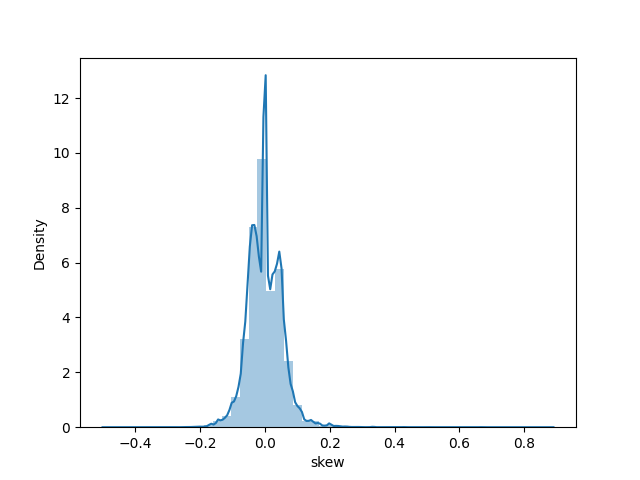

In [ ]:
sns.distplot(skew_pandas)
plt.xlabel("skew")
%matplot plt

### IMPLICATIONS

The above graph is close to normal distribution so I would not say that it's negatively skewed. I can interpret that reviewers who left a written response were NOT more dissatisfied than normal.

# Should the Elite be Trusted?

How accurate or close are the ratings of an "elite" user (check Users table schema) vs the actual business rating?

In [22]:
users = spark.read.json('s3://cis9760-yelpbucket/yelp_academic_dataset_user.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [23]:
users.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- average_stars: double (nullable = true)
 |-- compliment_cool: long (nullable = true)
 |-- compliment_cute: long (nullable = true)
 |-- compliment_funny: long (nullable = true)
 |-- compliment_hot: long (nullable = true)
 |-- compliment_list: long (nullable = true)
 |-- compliment_more: long (nullable = true)
 |-- compliment_note: long (nullable = true)
 |-- compliment_photos: long (nullable = true)
 |-- compliment_plain: long (nullable = true)
 |-- compliment_profile: long (nullable = true)
 |-- compliment_writer: long (nullable = true)
 |-- cool: long (nullable = true)
 |-- elite: string (nullable = true)
 |-- fans: long (nullable = true)
 |-- friends: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- name: string (nullable = true)
 |-- review_count: long (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)
 |-- yelping_since: string (nullable = true)

In [24]:
business = business.withColumnRenamed('stars',"business_stars")
review = review.withColumnRenamed('stars',"review_stars")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [25]:
business_only = business.select("business_id", "business_stars")
review_only = review.select("business_id", "user_id", "review_stars")
users_only = users.select("user_id", "elite").filter(users.elite != "")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [26]:
business_review = business_only.join(review_only, business_only.business_id == review_only.business_id)
business_review_user = business_review.join(users_only, business_review.user_id == users_only.user_id)
business_review_user.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------+--------------------+--------------------+------------+--------------------+--------------------+
|         business_id|business_stars|         business_id|             user_id|review_stars|             user_id|               elite|
+--------------------+--------------+--------------------+--------------------+------------+--------------------+--------------------+
|TV81bpCQ6p6o4Hau5...|           4.5|TV81bpCQ6p6o4Hau5...|IeSz60ozr1yAVIH8C...|         4.0|IeSz60ozr1yAVIH8C...|2017,2018,2019,20...|
|W4ZEKkva9HpAdZG88...|           4.0|W4ZEKkva9HpAdZG88...|xW2A0MciHB0pLB4RH...|         5.0|xW2A0MciHB0pLB4RH...|2014,2015,2016,20...|
|E-4t5Hoon6aVFTWDP...|           4.0|E-4t5Hoon6aVFTWDP...|SSafXe2aUO0cXgQhE...|         5.0|SSafXe2aUO0cXgQhE...|2014,2015,2016,20...|
|_pbx96FZ3eHJw-V_R...|           2.5|_pbx96FZ3eHJw-V_R...|yiYUEExKfZEv_T8CF...|         3.0|yiYUEExKfZEv_T8CF...|                2015|
|8uF-bhJFgT4Tn6DTb...|           4.5|8uF-bhJFgT4Tn6DTb.

In [28]:
business_review_user.select("business_stars", "review_stars", "elite").show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------+------------+--------------------+
|business_stars|review_stars|               elite|
+--------------+------------+--------------------+
|           4.5|         4.0|2017,2018,2019,20...|
|           4.0|         5.0|2014,2015,2016,20...|
|           4.0|         5.0|2014,2015,2016,20...|
|           2.5|         3.0|                2015|
|           4.5|         5.0|          2019,20,20|
+--------------+------------+--------------------+
only showing top 5 rows

In [ ]:
diff_added = business_review_user.withColumn("difference", (business_review_user.business_stars - business_review_user.review_stars))

In [30]:
diff_added = diff_added.select("business_stars", "review_stars", "elite", "difference")
diff_added.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------+------------+--------------------+----------+
|business_stars|review_stars|               elite|difference|
+--------------+------------+--------------------+----------+
|           4.5|         4.0|2017,2018,2019,20...|       0.5|
|           4.0|         5.0|2014,2015,2016,20...|      -1.0|
|           4.0|         5.0|2014,2015,2016,20...|      -1.0|
|           2.5|         3.0|                2015|      -0.5|
|           4.5|         5.0|          2019,20,20|      -0.5|
|           4.5|         4.0|2011,2012,2013,20...|       0.5|
|           4.5|         5.0|2018,2019,20,20,2021|      -0.5|
|           2.0|         4.0|2012,2013,2014,20...|      -2.0|
|           4.0|         5.0|2017,2018,2019,20,20|      -1.0|
|           4.0|         4.0|                2015|       0.0|
|           3.5|         4.0|2018,2019,20,20,2021|      -0.5|
|           4.5|         5.0|           2014,2015|      -0.5|
|           3.5|         4.0|           2017,2018|      -0.5|
|       

In [31]:
diff_pandas = diff_added.select("difference").toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [34]:
diff_pandas.plot.hist()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

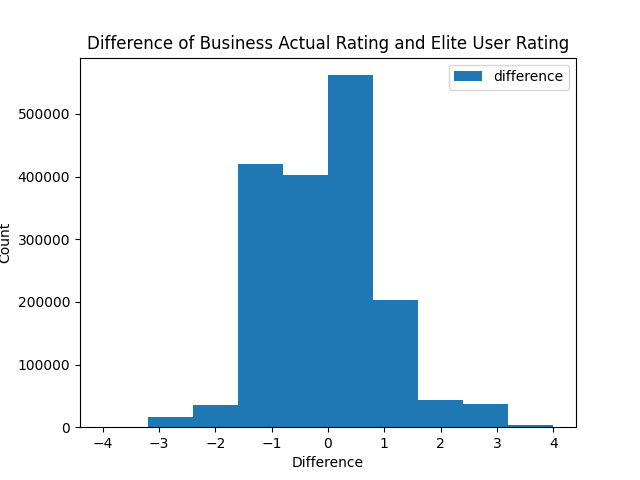

In [35]:
plt.xlabel('Difference')
plt.ylabel('Count')
plt.title('Difference of Business Actual Rating and Elite User Rating')
%matplot plt